# ML Exercise 1: Linear Regression

This notebook is to help you get started on Exercise 1 for Project 4 on Machine Learning.

Exercise 1 covers the material we discussed in the Intro to ML presentation which you can find [on this Canvas page](https://canvas.tufts.edu/courses/62563/pages/intro-to-ml-slides-and-exercise-materials?module_item_id=1651708).

In this exercise your group is being asked to implement a linear regression model.  

The task is to estimate profits for opening a new food truck based on the population of the city.  You are provided data for the profit for past trucks along with the population of the cities in which they operated.

The objectives for this exercise is to:
* Import data, text file with (x,y) pairs
* Create arrays X, Y, theta
* [Result 1] Calculate theta using Normal Equation
* [Result 2] Plot data points and model curve
* [Result 3] Implement gradient solver - compare to Normal Equation solution
* [Result 4] Plot loss and gradient norm vs. iteration step
* [Optional Study] Plot path of 2d parameter values during gradient descent

## 1.1 Loading the Data

You can download the data the following GoogleDrive [link](https://drive.google.com/file/d/1Duglp2NZQQWJ4j1iUPZmAAcFKEUT0Jvi/view?usp=sharing).

In the rest that follows, we assume that the file, `ex1data.txt`, has been uploaded into `/content/drive/sample_data/`.

The data is in a very simple CSV format.

The first column of data is the population in 10K people.  The second column is the profit in 10K dollars.


Here is an example of the first bit of the file:

```
6.1101,17.592
5.5277,9.1302
8.5186,13.662
7.0032,11.854
5.8598,6.8233
8.3829,11.886
7.4764,4.3483
8.5781,12
6.4862,6.5987
5.0546,3.8166
...
```


Import the packages.

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression

# we use numpy's import function
from numpy import genfromtxt


In [86]:
data = genfromtxt('ex1data1.txt', delimiter=',')

print("shape of numpy array (expected to be (97,2)): ",data.shape)

shape of numpy array (expected to be (97,2)):  (97, 2)


In [87]:
# Example of slicing an array

# if you want only the population data column in the array, we can slice it out
population_data = data[:,0].reshape((-1, 1)) # take slice of array involving all rows (':') and only the 0-th column
print("population_data.shape=",population_data.shape) # should be (97,) which is a one-dimensional array

# likewise, this is how you get the profit values, which is the 1-indexed column
profit_data = data[:,1]
print("profit_data.shape=",profit_data.shape)

population_data.shape= (97, 1)
profit_data.shape= (97,)


In [88]:
N = len(population_data)

In [89]:
model = LinearRegression()
model.fit(population_data,profit_data)
profit_data_predict = model.predict(population_data)

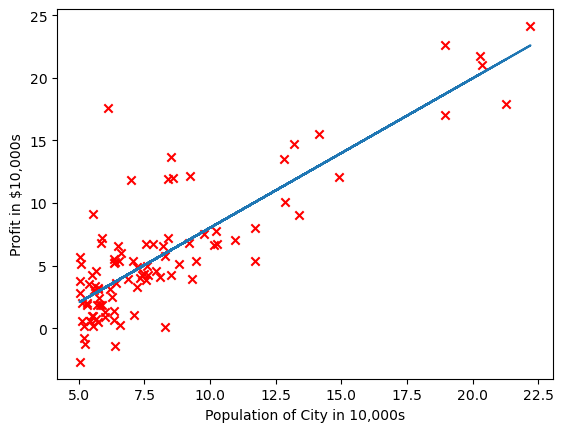

In [90]:
# visualizing the data
plt.scatter(population_data, profit_data, marker='x', c='r')
plt.plot(population_data,profit_data_predict)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

Formulazing Performance P, squared difference

In [91]:
y_squared = (profit_data_predict - profit_data)**2
print(y_squared)

def summation_y_squared():
    summation_y_squared = 0
    for i in range(population_data - 1):
        summation_y_squared = ((profit_data_predict(i) - profit_data(i))**2)/ np.size(population_data)
    return summation_y_squared

summation_y_squared
print(summation_y_squared)

[2.01589622e+02 4.13609612e+01 5.46831333e+01 5.46819972e+01
 1.38990452e+01 3.34164826e+01 4.56321676e-01 3.20561941e+01
 7.59678207e+00 2.82936965e+00 1.12173849e-01 6.26326874e+00
 4.41109049e-02 1.18826740e+00 4.48416199e+00 9.81834638e-01
 2.58066399e+00 2.76833366e+00 1.51654891e-02 7.21443984e-01
 1.22096886e-01 2.19036718e+00 2.58858131e+00 2.35939044e+00
 1.15034900e-01 1.54587248e+01 4.37874579e+00 4.53514829e+00
 8.22754406e+00 2.41446498e+00 1.28917551e+01 4.12498124e+00
 2.49636845e+01 1.64823166e+00 4.12500891e-01 1.01350979e+00
 2.71096291e+00 3.60091637e-01 1.69259834e+00 3.28827784e+00
 3.99305395e+00 1.63032779e-01 2.19666288e+01 3.04524597e-01
 1.67042835e+00 1.23919915e+01 8.88374802e+00 1.39590564e+00
 4.23706309e+00 2.88196243e+00 2.72404658e+00 3.56270265e-01
 4.52500525e-01 3.12841366e-02 5.00042310e+00 2.61294847e+01
 1.24088641e+00 3.13866944e+00 1.05573069e+01 3.87531501e+00
 2.14276385e+00 9.15721025e+00 1.26862913e+01 3.37076634e+00
 2.78537401e+00 2.870497

In [98]:
X_matrix_T = np.transpose(X_matrix)
print(X_matrix_T)
X_matmul = np.matmul(X_matrix, X_matrix_T)
print(X_matmul)
X_matmul_inv = np.linalg.inv(X_matmul) 
X_matmul_Y = np.matmul(X_matrix, profit_data)
print(X_matmul_Y )
theta = np.matmul(X_matmul_inv, X_matmul_Y )
print(theta)

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

<function matplotlib.pyplot.show(close=None, block=None)>

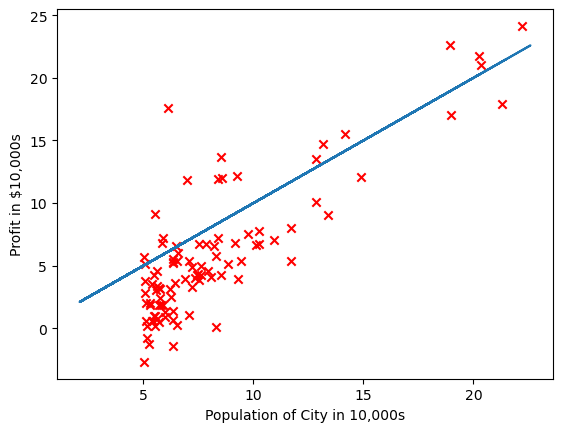

In [109]:
juliansucks = theta[0] + theta[1]*population_data
plt.scatter(population_data, profit_data, marker='x', c='r')
plt.plot(juliansucks, profit_data_predict)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show